In [1]:
## For google colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
os.chdir("/content/drive/My Drive/SENG474-FinalProject")

Mounted at /content/drive


In [2]:
import pickle

with open("X_100.pickle", 'rb') as pickle_in:
    X = pickle.load(pickle_in)

with open("y_100.pickle", 'rb') as pickle_in:
    y = pickle.load(pickle_in)

In [3]:
import numpy as np

IMG_SIZE = 100

X = np.array(X).reshape(-1, IMG_SIZE * IMG_SIZE)

y = np.array(y).reshape(-1, 1)

In [4]:
%%time

from sklearn import decomposition

pca = decomposition.PCA()

pca.fit(X)

X_transformed = pca.transform(X)


CPU times: user 2h 30min 31s, sys: 10min 45s, total: 2h 41min 17s
Wall time: 21min 16s


In [5]:
print(X_transformed.shape)

(100000, 10000)


Top 4 principal components

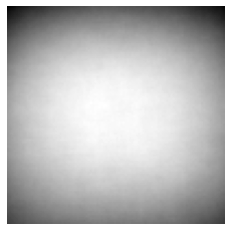

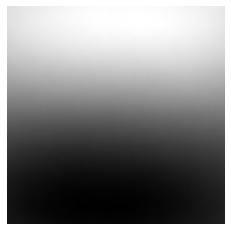

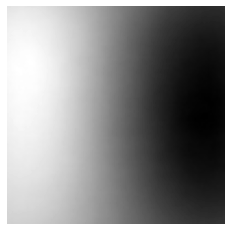

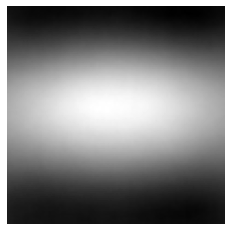

In [6]:
import matplotlib.pyplot as plt

pca.components_.shape

for i in range(4):
  fig, ax = plt.subplots(1,1)
  ax.imshow(pca.components_[i].reshape(100, 100) , cmap='gray')
  ax.axis('off')

plt.show()

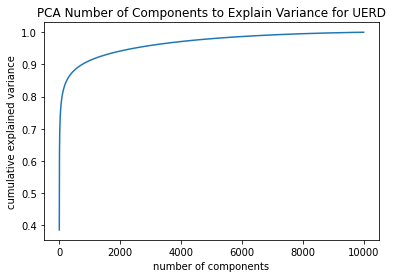

In [7]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA Number of Components to Explain Variance for UERD')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Treting PCA like clustering we will use the elbow method and find that around 100 components explain 80% of the varience

In [11]:
sum(pca.explained_variance_ratio_[:100])

0.8052478462643504

In [12]:
%%time

pca = decomposition.PCA(n_components = 100)

pca.fit(X)

X_transformed = pca.transform(X)

CPU times: user 7min 43s, sys: 46 s, total: 8min 30s
Wall time: 1min 13s


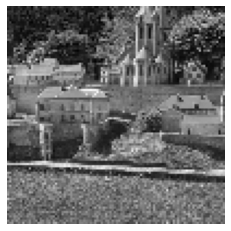

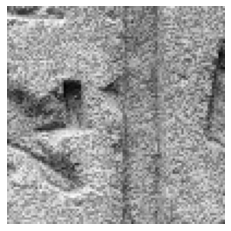

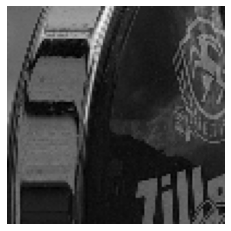

In [16]:
for i in range(3):
  fig, ax = plt.subplots(1,1)
  ax.imshow(X[i].reshape(100, 100) , cmap='gray')
  ax.axis('off')

plt.show()

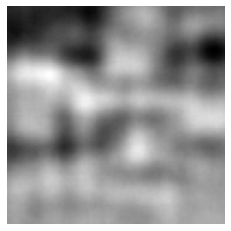

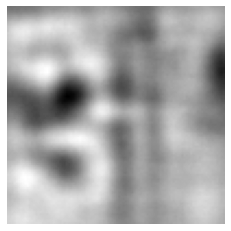

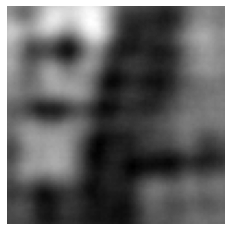

In [17]:
for i in range(3):
  fig, ax = plt.subplots(1,1)
  ax.imshow(pca.inverse_transform(X_transformed[i]).reshape(100, 100) , cmap='gray')
  ax.axis('off')

plt.show()

In [18]:
X_transformed.shape

(100000, 100)

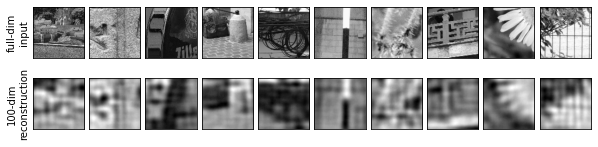

In [20]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(X[i].reshape(100, 100), cmap='binary_r')
    ax[1, i].imshow(pca.inverse_transform(X_transformed[i]).reshape(100, 100), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('100-dim\nreconstruction');

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# just usning default for comparision
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = 3))


In [85]:
%%time

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y.ravel(), test_size=0.10, random_state=1337)

CPU times: user 47.3 ms, sys: 18 ms, total: 65.3 ms
Wall time: 61.3 ms


In [87]:
!pip3 install csv_logger

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
from csv_logger import CsvLogger

LOG_FILE_NAME = 'log_abc.csv'
LOG_FORMAT = '%(message)s'
LOG_HEADER = ['samples', 'accuracy', 'loss', 'val_accuracy', 'val_loss']

# Creat logger with csv rotating handler
csvlogger = CsvLogger(filename = LOG_FILE_NAME, fmt=LOG_FORMAT, header=LOG_HEADER)

In [106]:
!ls

images	     log_deep.csv  SRM_Kernels1.npy	   tmp		 y_100.pickle
log_abc.csv  logs	   Steganography_CNN	   X_100.pickle  y_256.pickle
log.csv      src	   Steganography_CNN_Deep  X_256.pickle


In [105]:
%%time

from sklearn.metrics import log_loss

train_accuracy = []
val_accuracy = []

train_loss = []
val_loss = []

# range = np.arange(1000, 100000, 1000)

range = np.arange(1000, 100000, 1000)

for i in range:

  print(f"Fitting with {i} samples")

  abc.fit(X_train[:i], y_train[:i])

  accuracy = abc.score(X_train,y_train)
  val_acc = abc.score(X_test,y_test)
  loss = log_loss(y_train[:i], abc.predict(X_train[:i]))
  val_l = log_loss(y_test[:i], abc.predict(X_test[:i]))

  train_accuracy.append(accuracy)
  val_accuracy.append(val_acc)

  train_loss.append(loss)
  val_loss.append(val_l)

  csvlogger.info([i, accuracy, loss, val_acc, val_l])
  
  

Fitting with 1000 samples
Fitting with 2000 samples
Fitting with 3000 samples
Fitting with 4000 samples
Fitting with 5000 samples
Fitting with 6000 samples
Fitting with 7000 samples
Fitting with 8000 samples
Fitting with 9000 samples
Fitting with 10000 samples
Fitting with 11000 samples
Fitting with 12000 samples
Fitting with 13000 samples
Fitting with 14000 samples
Fitting with 15000 samples
Fitting with 16000 samples
Fitting with 17000 samples
Fitting with 18000 samples
Fitting with 19000 samples
Fitting with 20000 samples
Fitting with 21000 samples
Fitting with 22000 samples
Fitting with 23000 samples
Fitting with 24000 samples
Fitting with 25000 samples
Fitting with 26000 samples
Fitting with 27000 samples
Fitting with 28000 samples
Fitting with 29000 samples
Fitting with 30000 samples
Fitting with 31000 samples
Fitting with 32000 samples
Fitting with 33000 samples
Fitting with 34000 samples
Fitting with 35000 samples
Fitting with 36000 samples
Fitting with 37000 samples
Fitting wi